In [1]:
import warnings
warnings.filterwarnings('ignore')

import datacube
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def data_plot(VV, VH, water):
    """Plot VV, VH, Water/Land in one line"""
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,16))
    axes[0].imshow(np.squeeze(VV, 0))
    axes[0].set_title('VV Backscatter')
    axes[1].imshow(np.squeeze(VH, 0))
    axes[1].set_title('VH Backscatter')
    axes[2].imshow(water)
    axes[2].set_title('Water - Land')
    fig.tight_layout()

In [3]:
dc = datacube.Datacube(app="gt-data")
product_name = "S1_GRD_Train"
res = (-0.00008983, 0.00008983)
resample = "nearest"

## Image 1 (2021-03-22T04:22:49)

In [4]:
dt = "2021-03-22T04:22:49"

### Data 1 

In [5]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.245, 41.255),
            x = (26.352, 26.362),
            resolution = res,
            resampling = resample
        )

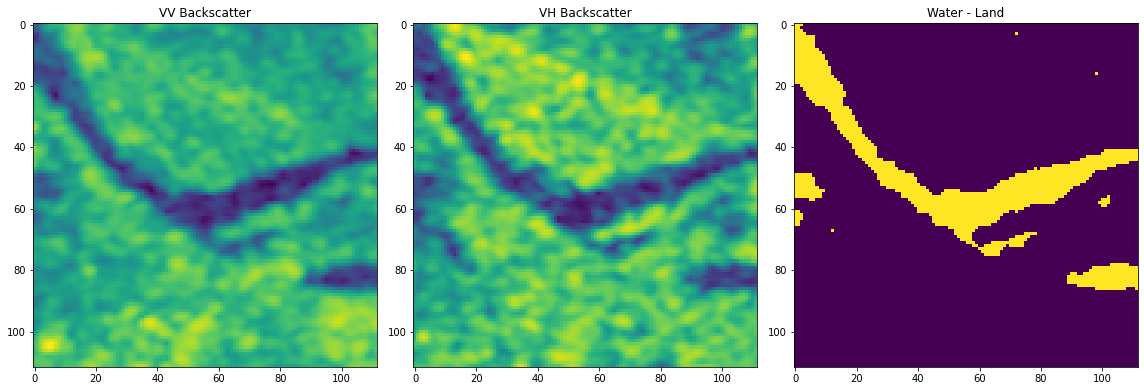

In [6]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -18, 0, 1)
vv_thr1 = xr.where(vv1 > -14.6, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [7]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.985, 41.0),
            x = (26.015, 26.03),
            resolution = res,
            resampling=resample
        )

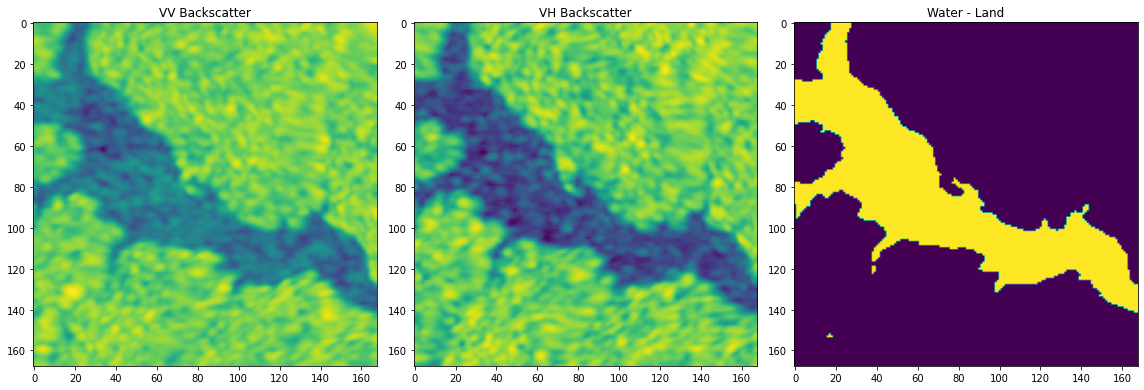

In [8]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vh_thr2 = xr.where(vh2 > -17.5, 0, 1)
vv_thr2 = xr.where(vv2 > -14.4, 0, 1)
water2 = xr.ufuncs.minimum(vv_thr2, vh_thr2)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [9]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.197, 41.204),
            x = (26.38, 26.39),
            resolution = res,
            resampling=resample
        )

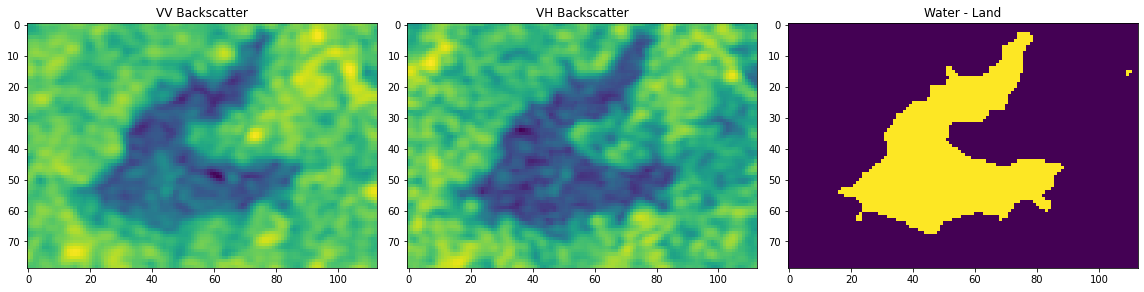

In [10]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -19, 0, 1)
vv_thr3 = xr.where(vv3 > -14.9, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [11]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

In [12]:
data1 = np.stack((vh_f, vv_f, water_f), axis=0)
data1.shape

(3, 49695)

## Image 2 (2021-05-10T16:08:22)

### Data 1

In [13]:
dt = "2021-05-10T16:08:22"

In [14]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.624, 41.635),
            x = (25.97, 25.99),
            resolution = res,
            resampling = resample
        )

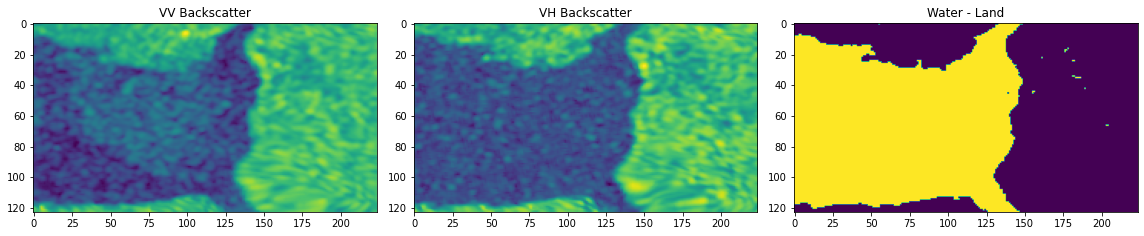

In [15]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -20.7, 0, 1)
vv_thr1 = xr.where(vv1 > -13, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [16]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.55, 41.56),
            x = (26.16, 26.17),
            resolution = res,
            resampling = resample,
        )

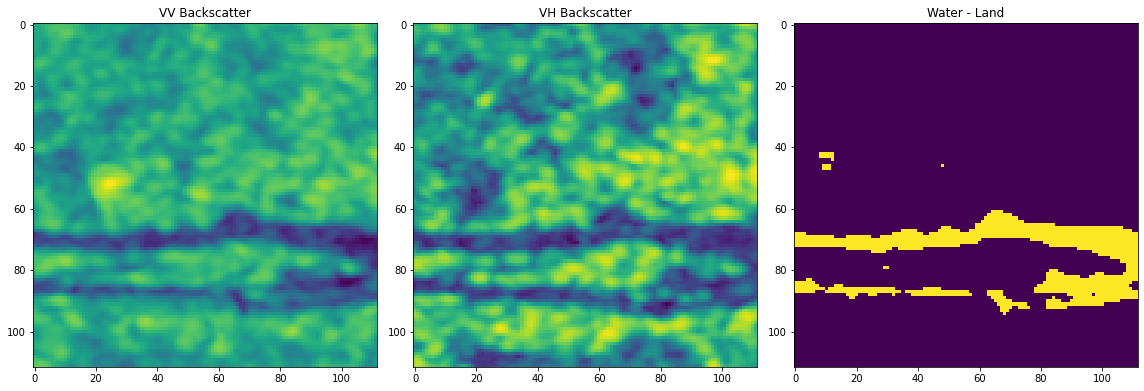

In [17]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vh_thr2 = xr.where(vh2 > -18, 0, 1)
vv_thr2 = xr.where(vv2 > -17.8, 0, 1)
water2 = xr.ufuncs.minimum(vv_thr2, vh_thr2)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [18]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.68, 41.70),
            x = (26.4, 26.42),
            resolution = res,
            resampling = resample
        )

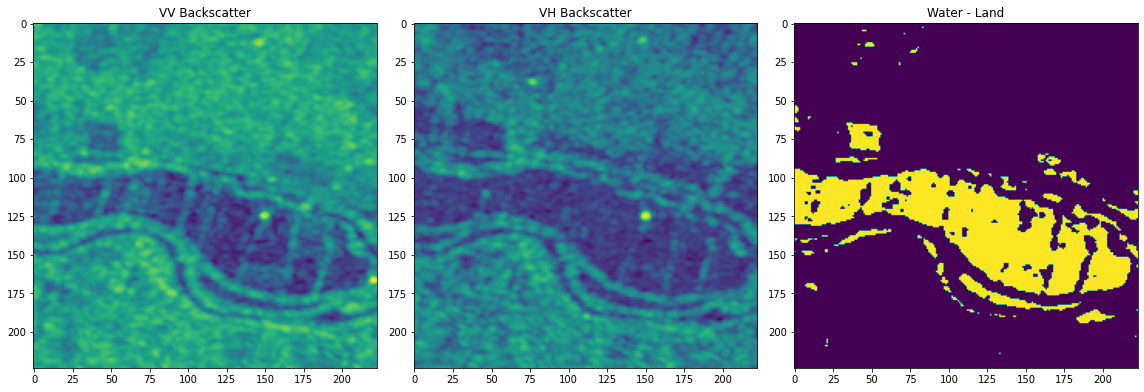

In [19]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -22, 0, 1)
vv_thr3 = xr.where(vv3 > -16.3, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [20]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

In [21]:
data2 = np.stack((vh_f, vv_f, water_f), axis=0)

In [22]:
data2.shape

(3, 90048)

## Image 3 (2021-07-15T16:07:17)

### Data 1

In [23]:
dt = "2021-07-15T16:07:17"

In [24]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.81, 40.82),
            x = (26.045, 26.055),
            resolution = res,
            resampling = resample
        )

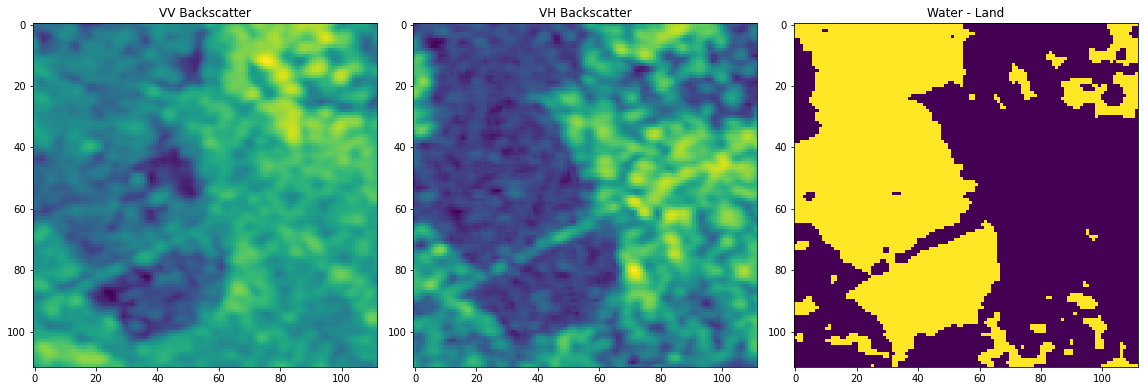

In [25]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -24, 0, 1)
vv_thr1 = xr.where(vv1 > -10, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [26]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.18, 41.19),
            x = (26.58, 26.59),
            resolution = res,
            resampling = resample
        )

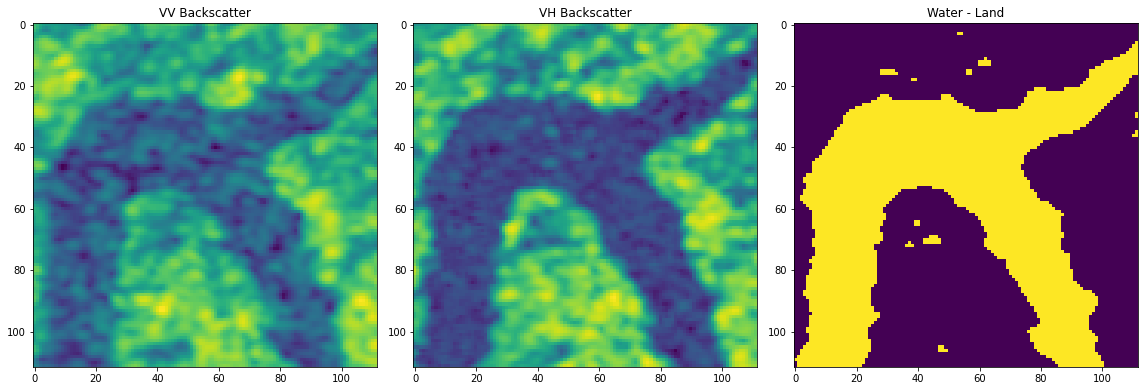

In [27]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()
vv_vh_r2 = vv2+vh2

vh_thr2 = xr.where(vh2 > -20, 0, 1)
vv_thr2 = xr.where(vv2 > -14, 0, 1)
water2 = xr.where(vv_vh_r2 > -38.4, 0, 1)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [28]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.76, 40.78),
            x = (26.38, 26.4),
            resolution = res,
            resampling = resample
        )

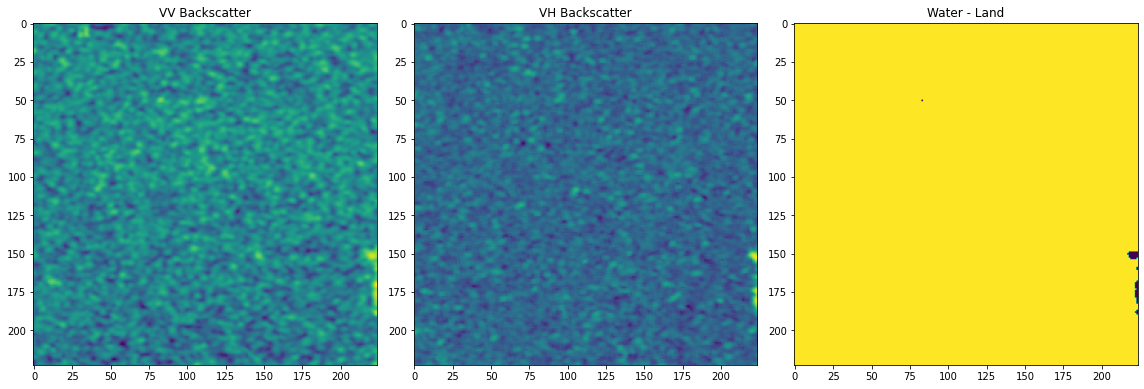

In [29]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -17, 0, 1)
vv_thr3 = xr.where(vv3 > -12, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [30]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

In [31]:
data3 = np.stack((vh_f, vv_f, water_f), axis=0)

In [32]:
data3.shape

(3, 75040)

## Image 4 (2021-09-18T16:15:31)

### Data 1

In [33]:
dt = "2021-09-18T16:15:31"

In [34]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.81, 40.815),
            x = (26.035, 26.04),
            resolution = res,
            resampling = resample
        )

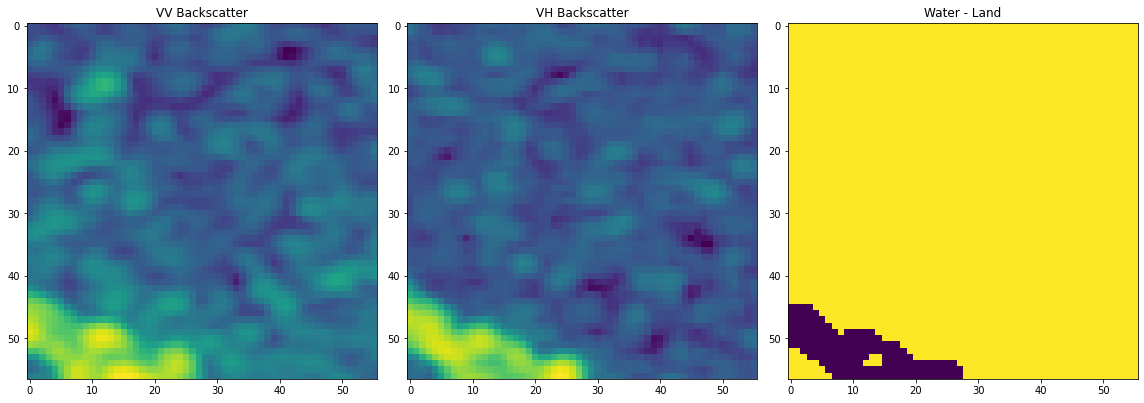

In [35]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -23, 0, 1)
vv_thr1 = xr.where(vv1 > -13, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [36]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.195, 41.205),
            x = (26.38, 26.39),
            resolution = res,
            resampling = resample
        )

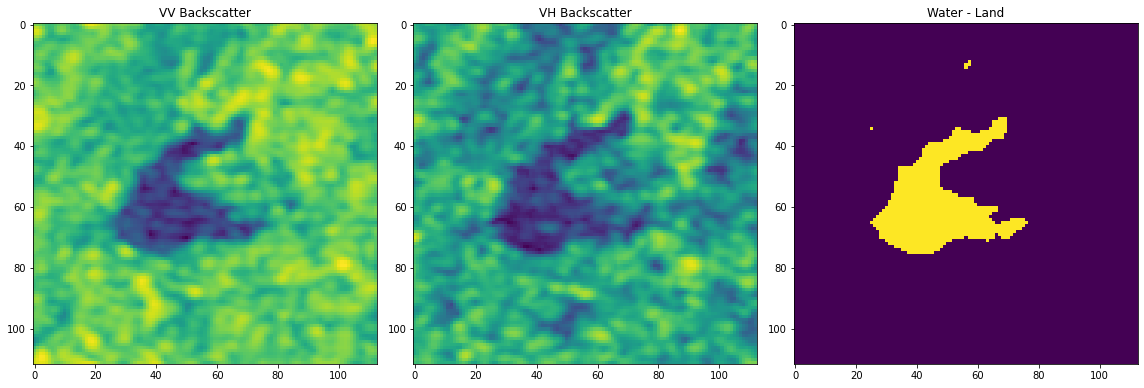

In [37]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vv_vh_r2 = vv2+vh2
water2 = xr.where(vv_vh_r2 > -45, 0, 1)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [38]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.76, 40.78),
            x = (26.38, 26.4),
            resolution = res,
            resampling = resample
        )

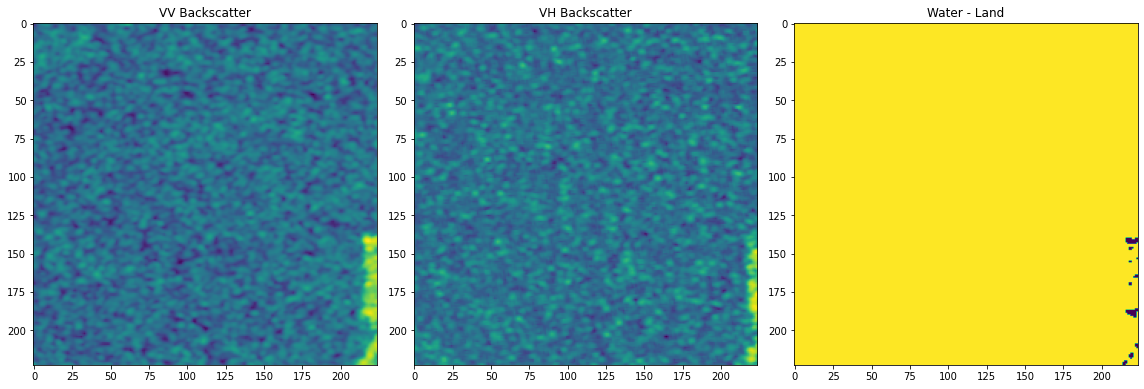

In [39]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -19, 0, 1)
vv_thr3 = xr.where(vv3 > -12, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [40]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data4 = np.stack((vh_f, vv_f, water_f), axis=0)
data4.shape

(3, 65800)

## Image 5 (2021-11-17T04:22:58)

### Data 1

In [41]:
dt = "2021-11-17T04:22:58"

In [42]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.79, 40.80),
            x = (26.37, 26.38),
            resolution = res,
            resampling = resample
        )

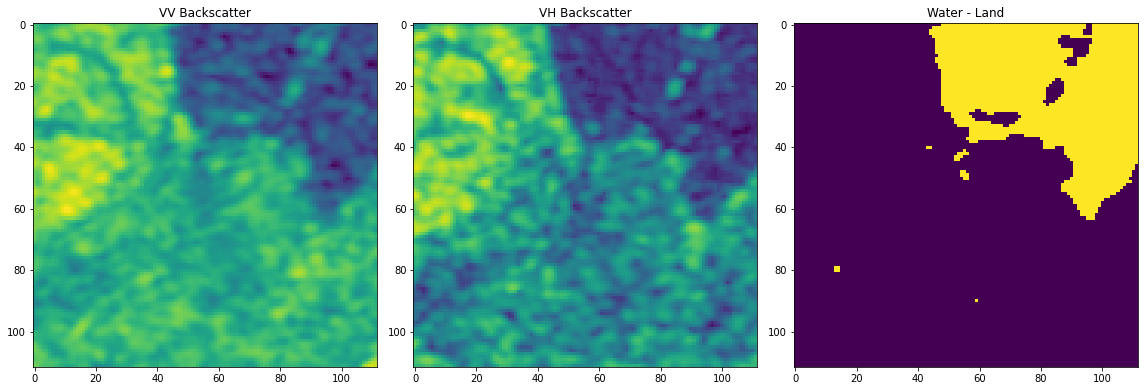

In [43]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -18, 0, 1)
vv_thr1 = xr.where(vv1 > -14.8, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [44]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.18, 41.19),
            x = (26.58, 26.588),
            resolution = res,
            resampling = resample
        )

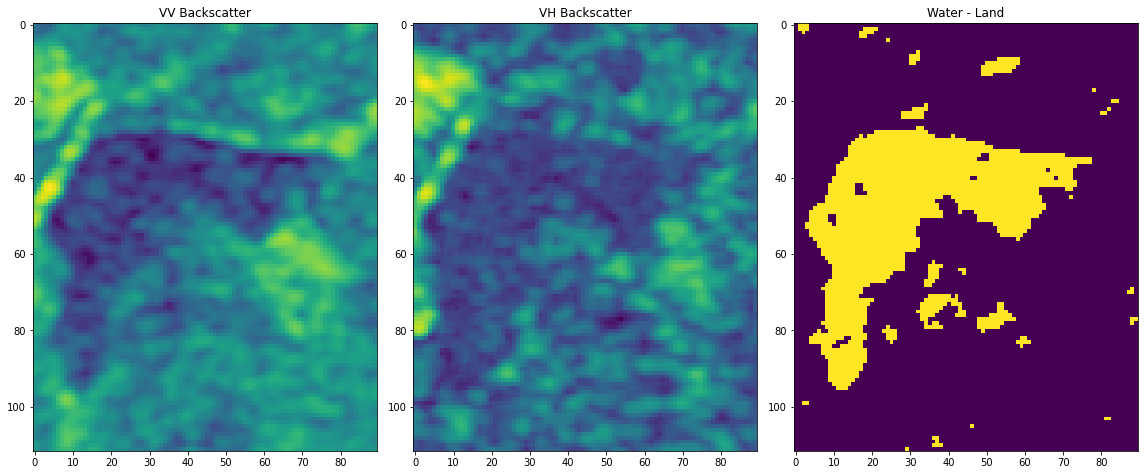

In [45]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vv_vh_r2 = vv2+vh2
water2 = xr.where(vv_vh_r2 > -41.5, 0, 1)


data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [46]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.985, 41.0),
            x = (26.015, 26.03),
            resolution = res,
            resampling = resample
        )

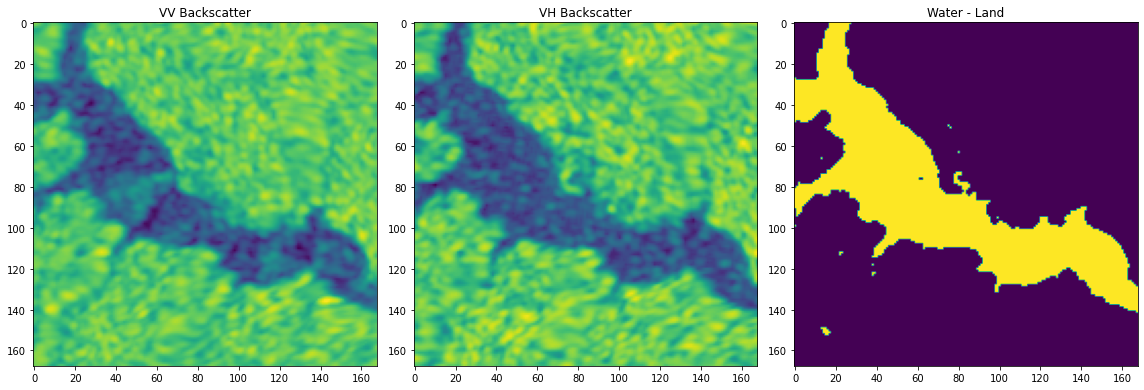

In [47]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -20, 0, 1)
vv_thr3 = xr.where(vv3 > -13, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [48]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data5 = np.stack((vh_f, vv_f, water_f), axis=0)
data5.shape

(3, 50848)

# Image 6 (2021-01-15T04:21:54)

In [49]:
dt = "2021-01-15T04:21:54"

### Data 1

In [50]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.27, 41.29),
            x = (26.675, 26.695),
            resolution = res,
            resampling = resample
        )

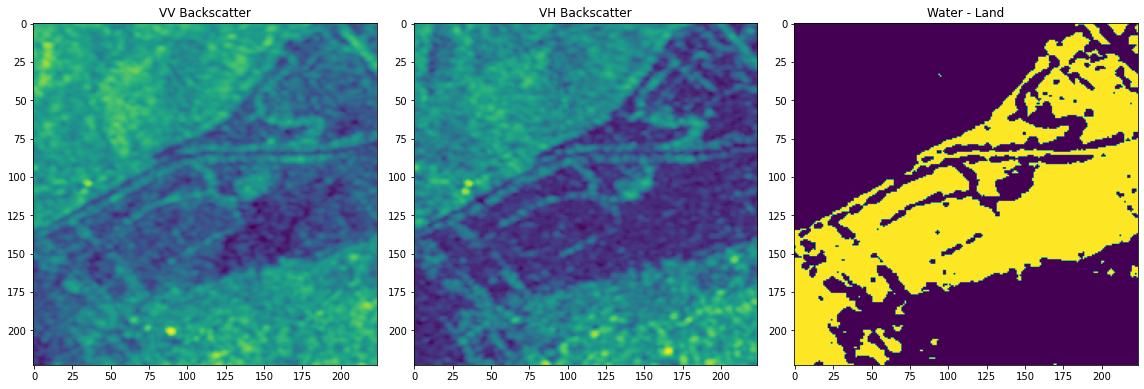

In [51]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -20.5, 0, 1)
vv_thr1 = xr.where(vv1 > -13, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [52]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.18, 41.19),
            x = (26.58, 26.59),
            resolution = res,
            resampling = resample
        )

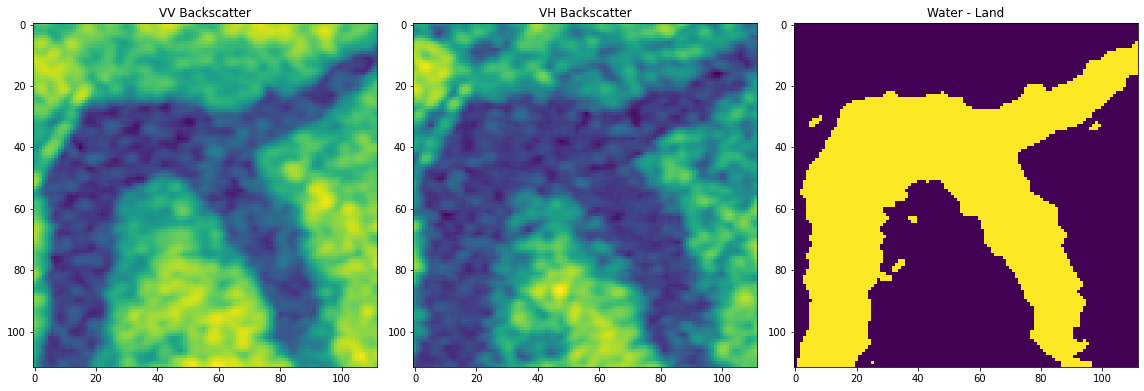

In [53]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vh_thr2 = xr.where(vh2 > -20, 0, 1)
vv_thr2 = xr.where(vv2 > -14.5, 0, 1)
water2 = xr.ufuncs.minimum(vv_thr2, vh_thr2)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [54]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (41.65, 41.67),
            x = (26.57, 26.60),
            resolution = res,
            resampling = resample
        )

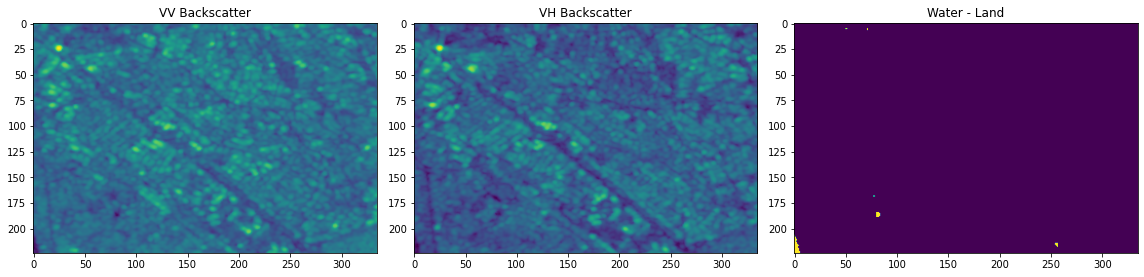

In [55]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -17, 0, 1)
vv_thr3 = xr.where(vv3 > -16, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [56]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data6 = np.stack((vh_f, vv_f, water_f), axis=0)
data6.shape

(3, 137536)

# Image 7 (2018-02-28T16:31:12)

In [57]:
dt = "2018-02-28T16:31:12"

### Data 1

In [58]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (39.665, 39.68),
            x = (22.43, 22.445),
            resolution = res,
            resampling = resample
        )

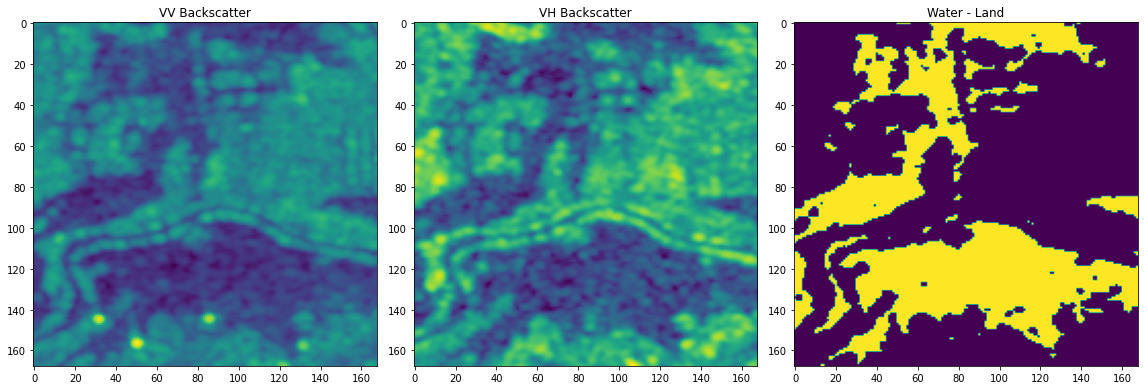

In [59]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -20, 0, 1)
vv_thr1 = xr.where(vv1 > -16, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [60]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (39.042, 39.064),
            x = (22.23, 22.25),
            resolution = res,
            resampling = resample
        )

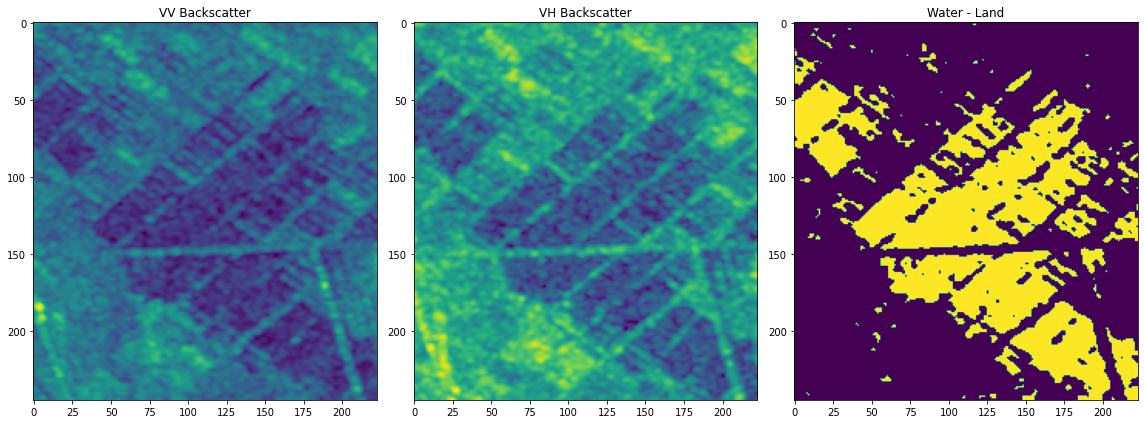

In [61]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vh_thr2 = xr.where(vh2 > -18.5, 0, 1)
vv_thr2 = xr.where(vv2 > -15, 0, 1)
water2 = xr.ufuncs.minimum(vv_thr2, vh_thr2)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [62]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (39.5, 39.52),
            x = (22.06, 22.08),
            resolution = res,
            resampling = resample
        )

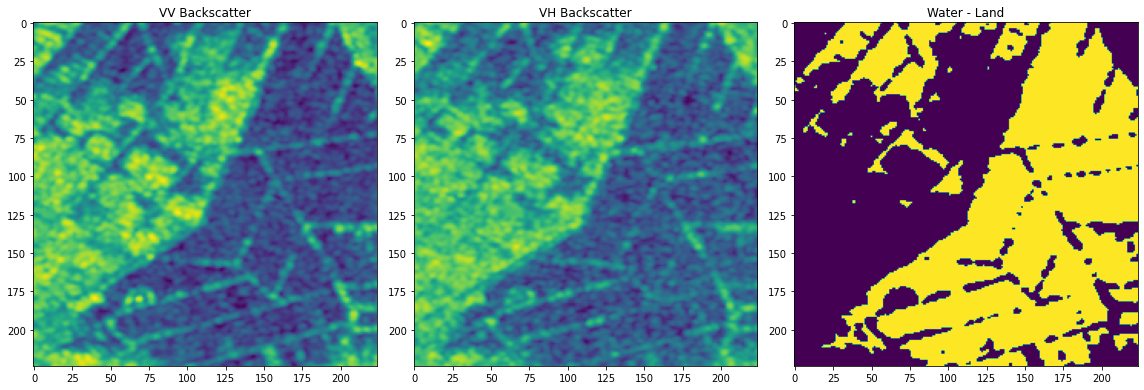

In [63]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -20, 0, 1)
vv_thr3 = xr.where(vv3 > -16, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [64]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data7 = np.stack((vh_f, vv_f, water_f), axis=0)
data7.shape

(3, 133035)

# Image 8 (2018-02-28T16:31:12)

In [65]:
dt = "2021-02-12T04:39:28"

### Data 1

In [66]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (39.45, 39.5),
            x = (22.4, 22.45),
            resolution = res,
            resampling = resample
        )

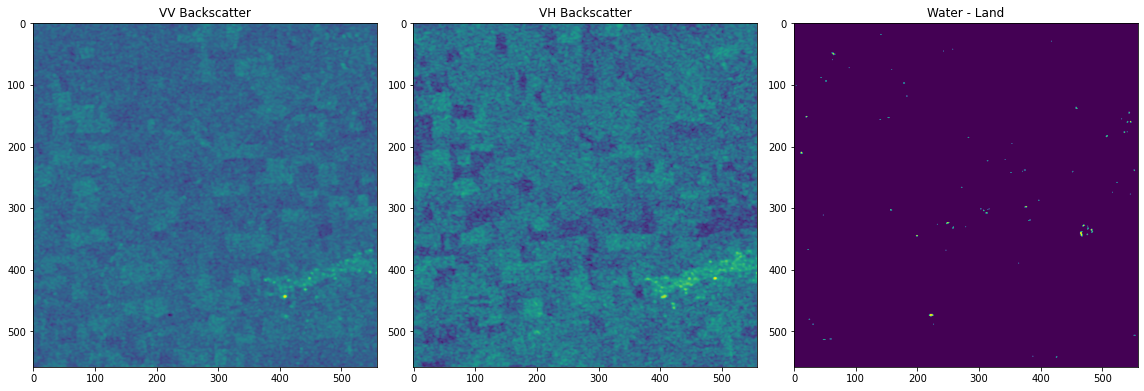

In [67]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vh_thr1 = xr.where(vh1 > -20, 0, 1)
vv_thr1 = xr.where(vv1 > -17, 0, 1)
water1 = xr.ufuncs.minimum(vv_thr1, vh_thr1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [68]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.16, 40.22),
            x = (21.89, 21.94),
            resolution = res,
            resampling = resample
        )

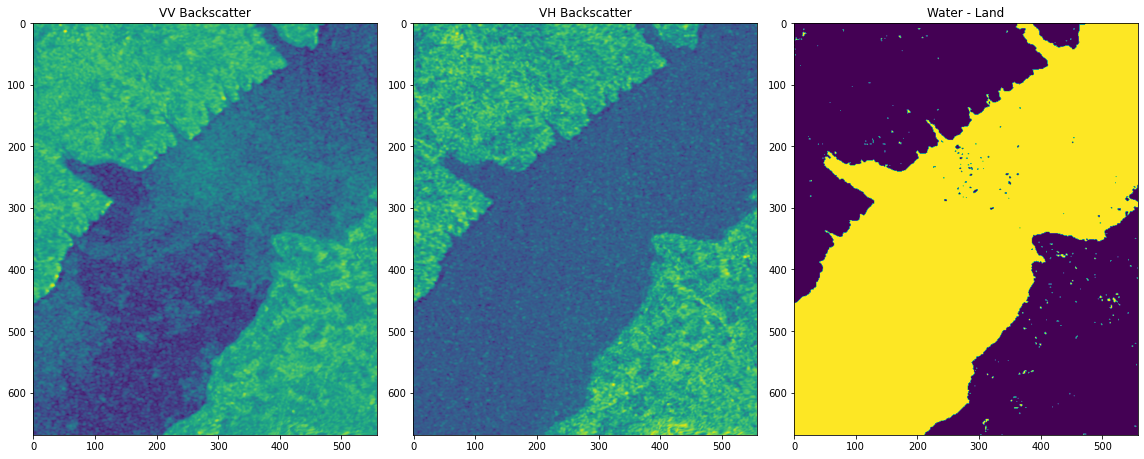

In [69]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vh_vv = vh2 + vv2
water2 = xr.where(vh_vv > -36, 0, 1)

vh_thr2 = xr.where(vh2 > -20, 0, 1)
vv_thr2 = xr.where(vv2 > -10, 0, 1)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [70]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (40.49, 40.55),
            x = (21.27, 21.31),
            resolution = res,
            resampling = resample
        )

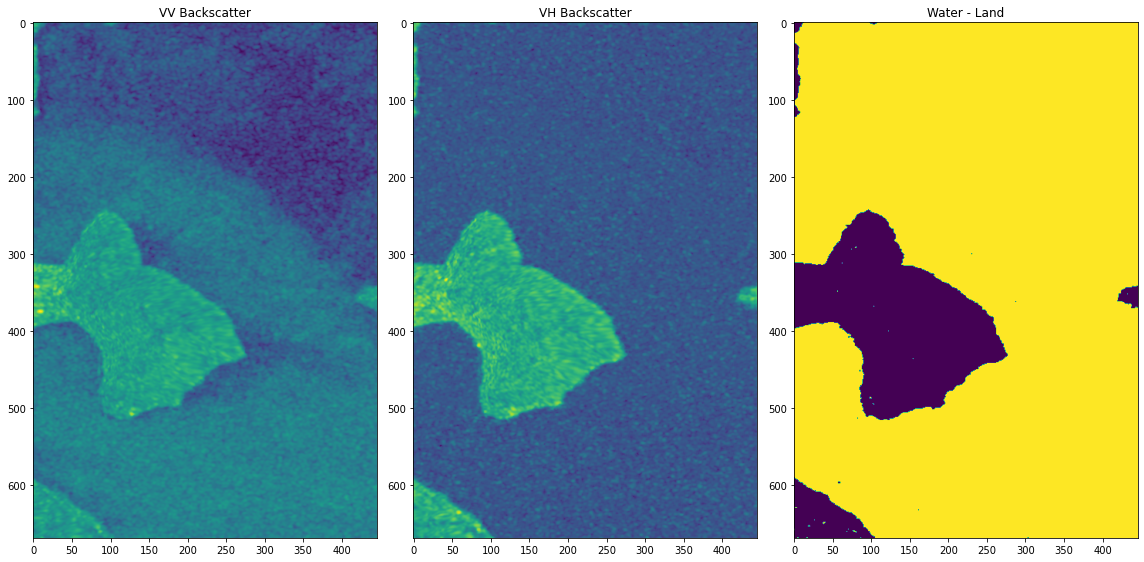

In [71]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_thr3 = xr.where(vh3 > -21, 0, 1)
vv_thr3 = xr.where(vv3 > -5, 0, 1)
water3 = xr.ufuncs.minimum(vv_thr3, vh_thr3)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [72]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data8 = np.stack((vh_f, vv_f, water_f), axis=0)
data8.shape

(3, 983040)

# Image 9 (2017-07-30T04:15:08)

In [73]:
dt = "2017-07-30T04:15:08"

### Data 1

In [74]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (35.42, 35.45),
            x = (26.82, 26.85),
            resolution = res,
            resampling = resample
        )

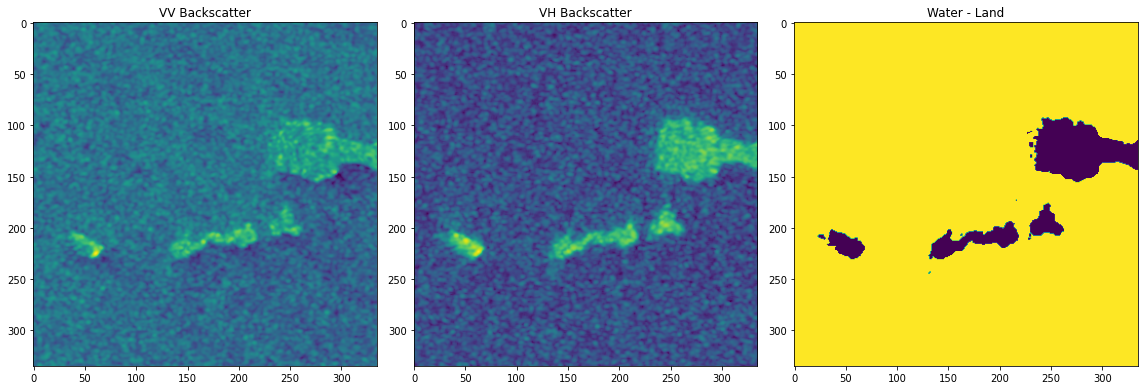

In [75]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vv_vh = vv1+vh1
water1 = xr.where(vv_vh > -33, 0, 1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [76]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (35.24, 35.25),
            x = (25.40, 25.415),
            resolution = res,
            resampling = resample
        )

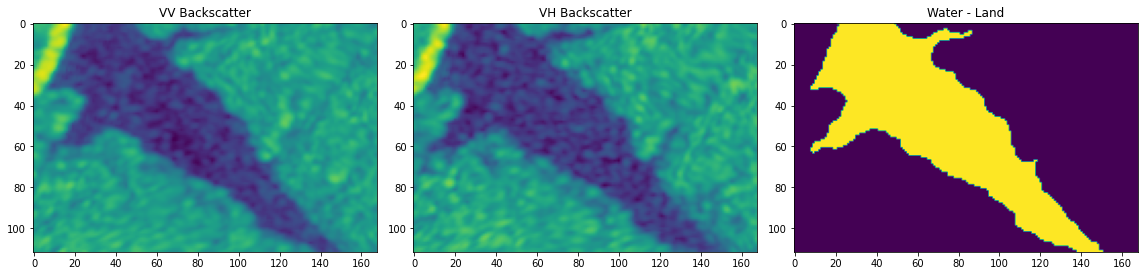

In [77]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vh_vv = vh2 + vv2
water2 = xr.where(vh_vv > -39, 0, 1)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [78]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (35.035, 35.045),
            x = (25.695, 25.705),
            resolution = res,
            resampling = resample
        )

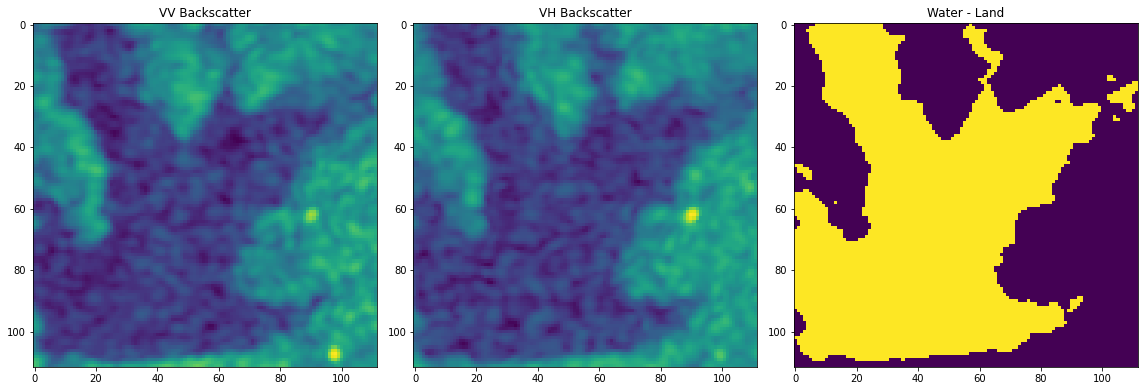

In [79]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vh_vv = vh3 + vv3
water3 = xr.where(vh_vv > -37, 0, 1)

data_plot(ds3.VV, ds3.VH, water3)

In [80]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data9 = np.stack((vh_f, vv_f, water_f), axis=0)
data9.shape

(3, 143585)

# Image 10 (2022-09-28T04:48:24)

In [81]:
dt = "2022-09-28T04:48:24"

### Data 1

In [82]:
ds1 = dc.load(product=product_name,
            time=(dt, dt),
            y = (38.19, 38.20),
            x = (20.30, 20.31),
            resolution = res,
            resampling = resample
        )

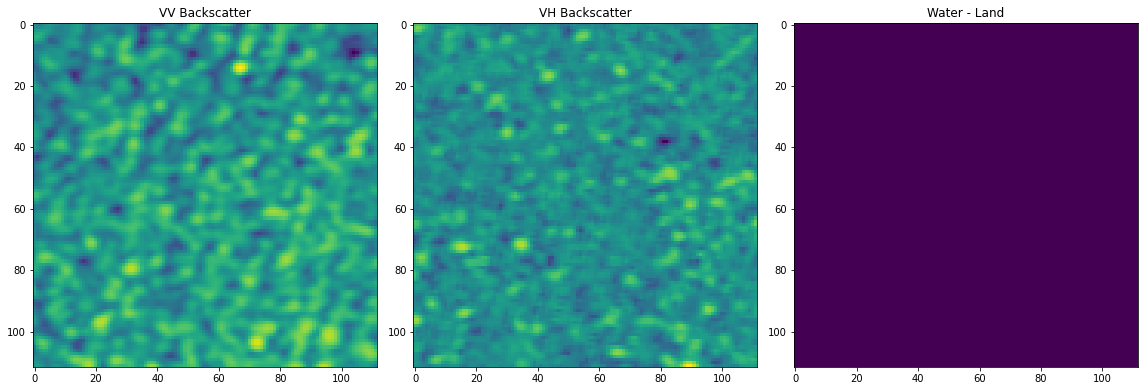

In [83]:
vh1 = ds1['VH'].values.squeeze()
vv1 = ds1['VV'].values.squeeze()

vv_vh = vv1+vh1
water1 = xr.where(vv_vh > -30, 0, 1)

data_plot(ds1.VV, ds1.VH, water1)

### Data 2

In [84]:
ds2 = dc.load(product=product_name,
            time=(dt, dt),
            y = (39.13, 39.15),
            x = (20.24, 20.26),
            resolution = res,
            resampling = resample
        )

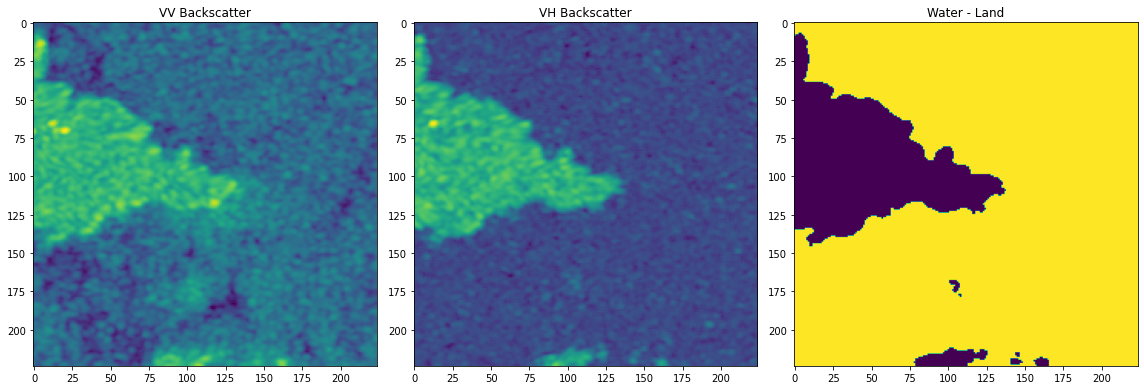

In [85]:
vh2 = ds2['VH'].values.squeeze()
vv2 = ds2['VV'].values.squeeze()

vv_vh = vv2+vh2
water2 = xr.where(vv_vh > -34.5, 0, 1)

data_plot(ds2.VV, ds2.VH, water2)

### Data 3

In [86]:
ds3 = dc.load(product=product_name,
            time=(dt, dt),
            y = (38.12, 38.13),
            x = (20.23, 20.24),
            resolution = res,
            resampling = resample
        )

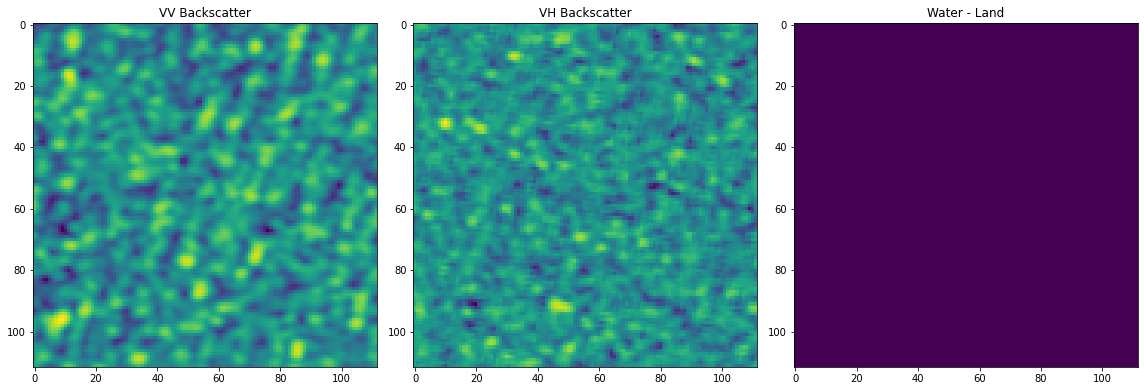

In [87]:
vh3 = ds3['VH'].values.squeeze()
vv3 = ds3['VV'].values.squeeze()

vv_vh = vv3+vh3
water3 = xr.where(vv_vh > -34.5, 0, 1)

data_plot(ds3.VV, ds3.VH, water3)

### Append data to one layer

In [88]:
vh_f = np.append(vh1.flatten(), vh2.flatten())
vh_f = np.append(vh_f, vh3.flatten())

vv_f = np.append(vv1.flatten(), vv2.flatten())
vv_f = np.append(vv_f, vv3.flatten())

water_f = np.append(water1.flatten(), water2.flatten())
water_f = np.append(water_f, water3.flatten())

data10 = np.stack((vh_f, vv_f, water_f), axis=0)
data10.shape

(3, 75264)

## Append all image data

In [89]:
data = np.append(data1, data2, axis=-1)
data = np.append(data, data3, axis=-1)
data = np.append(data, data4, axis=-1)
data = np.append(data, data5, axis=-1)
data = np.append(data, data6, axis=-1)
data = np.append(data, data7, axis=-1)
data = np.append(data, data8, axis=-1)
data = np.append(data, data9, axis=-1)
data = np.append(data, data10, axis=-1)

data.shape

(3, 1803891)

## Save data

In [90]:
np.save('gt_data.npy', data)